<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed


In [2]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-06-04 12:19:23--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24157 (24K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  23.59K  --.-KB/s    in 0.001s  

2021-06-04 12:19:23 (22.3 MB/s) - ‘data_phot.csv’ saved [24157/24157]



In [3]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [4]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [5]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4) 
  

In [22]:
data_sample_d.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,192.989542,192.939925,192.931157,192.893116,192.981337,192.928024,193.029526,192.971581,192.983826,192.869889,192.908698,192.951647,192.968289,193.004826,192.995308,192.985406,192.920824,193.074146,192.891351,192.986280,193.023058,192.951282,192.941396,192.911190,192.979250,192.956572,192.877089,192.960968,192.967909,192.987511,192.924132,192.948468,192.944252,193.022382,192.956631,192.988674,192.970663,192.981599,192.943707,193.032646,...,192.948022,192.970528,192.984652,192.977855,192.948877,192.932973,192.976597,192.942068,192.924154,192.979389,192.971903,192.956033,193.002177,192.945112,192.966077,192.944248,192.950474,192.939729,193.023308,192.885447,192.998903,192.989848,192.928911,192.964991,193.024082,193.006248,192.954802,192.915286,192.981896,192.986979,192.914447,192.914032,192.954944,192.941892,192.959854,192.992593,192.945714,192.948498,192.919112,192.978392
1,106.534562,106.514379,106.519569,106.534752,106.497217,106.546724,106.532108,106.527593,106.551769,106.529730,106.503989,106.542838,106.537299,106.523535,106.536291,106.520137,106.540928,106.561376,106.546878,106.519556,106.514382,106.550579,106.497432,106.523364,106.549645,106.554236,106.528672,106.558344,106.534156,106.540374,106.501213,106.521494,106.522133,106.473392,106.504543,106.525431,106.503249,106.499789,106.496454,106.550279,...,106.547334,106.497508,106.553611,106.547032,106.503406,106.514033,106.517892,106.577322,106.541686,106.537514,106.513047,106.541038,106.492032,106.494932,106.517040,106.510627,106.492779,106.483186,106.540802,106.488409,106.520817,106.512836,106.523673,106.541081,106.491733,106.530414,106.538978,106.515334,106.519551,106.498426,106.511200,106.507949,106.486029,106.549635,106.491590,106.537632,106.525580,106.535415,106.507055,106.512254
2,40.706424,40.706281,40.706361,40.706490,40.706521,40.706323,40.706477,40.706385,40.706348,40.706376,40.706272,40.706517,40.706556,40.706357,40.706423,40.706355,40.706297,40.706437,40.706371,40.706347,40.706248,40.706378,40.706321,40.706403,40.706478,40.706217,40.706293,40.706300,40.706433,40.706323,40.706302,40.706355,40.706285,40.706417,40.706411,40.706442,40.706553,40.706491,40.706338,40.706218,...,40.706527,40.706325,40.706389,40.706435,40.706440,40.706296,40.706388,40.706335,40.706217,40.706489,40.706303,40.706415,40.706322,40.706399,40.706325,40.706306,40.706346,40.706381,40.706393,40.706364,40.706316,40.706398,40.706369,40.706437,40.706295,40.706295,40.706382,40.706247,40.706432,40.706502,40.706462,40.706225,40.706454,40.706269,40.706337,40.706386,40.706403,40.706420,40.706378,40.706422
3,148.673919,148.683645,148.689731,148.673049,148.671773,148.681218,148.681709,148.683060,148.667270,148.678512,148.683584,148.669732,148.675107,148.672813,148.672897,148.664427,148.673957,148.680020,148.668376,148.658230,148.665114,148.668064,148.669120,148.677086,148.658463,148.649556,148.688178,148.668013,148.669174,148.681507,148.663792,148.675310,148.672446,148.671984,148.672364,148.669083,148.679137,148.664662,148.697972,148.695750,...,148.664560,148.661878,148.660412,148.667106,148.684342,148.661213,148.664838,148.679045,148.669260,148.658304,148.676491,148.675337,148.679402,148.687333,148.669514,148.675987,148.666842,148.668079,148.674653,148.691604,148.673809,148.685716,148.674730,148.663552,148.675082,148.665694,148.670863,148.672816,148.668683,148.666167,148.672220,148.681768,148.664773,148.678916,148.654516,148.662572,148.668567,148.680928,148.674720,148.660246
4,201.894429,201.853597,201.843018,201.850406,201.837891,201.823423,201.851782,201.855012,201.887437,201.816810,201.849705,201.855422,201.887845,201.906889,201.851963,201.848948,201.833173,201.856211,201.781787,201.843676

In [7]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(208) :
    M_r[i] = data_phot.r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]
    M_J[i] = data_phot.J[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_J[i]
    M_K[i] = data_phot.K[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_K[i]

M()

In [8]:
M_r = M_r.T
M_J = M_J.T
M_K = M_K.T

In [9]:
#Find Median each M
M_r['Median'] = np.median(M_r,axis=1)
M_J['Median'] = np.median(M_J,axis=1)
M_K['Median'] = np.median(M_K,axis=1)

In [10]:
print(M_r)
print(M_J)
print(M_K)

             0          1          2  ...       9998       9999     Median
0    10.500786  10.501344  10.501443  ...  10.501579  10.500911  10.501128
1    13.622341  13.622753  13.622647  ...  13.622902  13.622796  13.622532
2    11.890466  11.890474  11.890470  ...  11.890469  11.890466  11.890469
3    10.834188  10.834046  10.833957  ...  10.834176  10.834388  10.834219
4     9.878061   9.878500   9.878614  ...   9.877980   9.878738   9.878507
..         ...        ...        ...  ...        ...        ...        ...
203  10.794070  10.794042  10.794036  ...  10.794014  10.794019  10.794044
204  11.456849  11.456259  11.457117  ...  11.457870  11.457451  11.457160
205  12.135105  12.135072  12.135152  ...  12.135138  12.135167  12.135105
206  14.254758  14.254912  14.254631  ...  14.254960  14.254926  14.254869
207  11.202349  11.202604  11.202300  ...  11.202320  11.202021  11.202389

[208 rows x 10001 columns]
            0         1         2  ...      9998      9999    Median
0  

In [ ]:
#M_r.to_csv("M_r_phot.csv") 
#M_J.to_csv("M_J_phot.csv")
#M_K.to_csv("M_K_phot.csv")

In [11]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)
M_J['Percen14'] = np.percentile(M_J,14,axis=1)
M_J['Percen86'] = np.percentile(M_J,86,axis=1)
M_K['Percen14'] = np.percentile(M_K,14,axis=1)
M_K['Percen86'] = np.percentile(M_K,86,axis=1)

In [12]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']
M_J['M-'] = M_J['Percen14'] - M_J['Median']
M_J['M+'] = M_J['Percen86'] - M_J['Median']
M_K['M-'] = M_K['Percen14'] - M_K['Median']
M_K['M+'] = M_K['Percen86'] - M_K['Median']

In [13]:
M_K

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,6.696859,6.697418,6.697516,6.697944,6.696952,6.697551,6.696409,6.697061,6.696924,6.698206,6.697769,6.697286,6.697098,6.696687,6.696794,6.696906,6.697633,6.695907,6.697964,6.696896,6.696482,6.697290,6.697401,6.697741,6.696975,6.697230,6.698125,6.697181,6.697103,6.696882,6.697595,6.697321,6.697369,6.696490,6.697230,6.696869,6.697072,6.696949,6.697375,6.696374,...,6.697496,6.697005,6.697393,6.697595,6.696973,6.697058,6.697236,6.696717,6.697359,6.697123,6.697369,6.697299,6.697420,6.696479,6.698031,6.696754,6.696856,6.697542,6.697135,6.696471,6.696671,6.697250,6.697695,6.696945,6.696888,6.697704,6.697709,6.697249,6.697395,6.697193,6.696825,6.697352,6.697321,6.697652,6.696985,6.697202,6.696729,6.697681,-0.000473,0.000479
1,8.923302,8.923713,8.923608,8.923298,8.924063,8.923054,8.923352,8.923444,8.922951,8.923401,8.923925,8.923133,8.923246,8.923527,8.923267,8.923596,8.923172,8.922756,8.923051,8.923608,8.923713,8.922976,8.924059,8.923530,8.922995,8.922901,8.923422,8.922817,8.923310,8.923184,8.923982,8.923568,8.923555,8.924549,8.923914,8.923488,8.923940,8.924011,8.924079,8.922982,...,8.923721,8.923642,8.922431,8.923157,8.923242,8.923741,8.923170,8.924169,8.924110,8.923659,8.923790,8.924154,8.924349,8.923175,8.924243,8.923582,8.923745,8.923524,8.923169,8.924175,8.923387,8.923212,8.923694,8.923608,8.924039,8.923778,8.923845,8.924291,8.922995,8.924178,8.923239,8.923485,8.923285,8.923863,8.923757,8.923493,8.923018,8.923980,-0.000475,0.000487
2,6.979087,6.979095,6.979091,6.979084,6.979082,6.979093,6.979085,6.979090,6.979092,6.979090,6.979096,6.979082,6.979080,6.979091,6.979088,6.979091,6.979094,6.979087,6.979090,6.979092,6.979097,6.979090,6.979093,6.979089,6.979085,6.979099,6.979094,6.979094,6.979087,6.979093,6.979094,6.979091,6.979095,6.979088,6.979088,6.979087,6.979081,6.979084,6.979092,6.979098,...,6.979094,6.979089,6.979092,6.979098,6.979084,6.979094,6.979088,6.979093,6.979089,6.979093,6.979094,6.979092,6.979090,6.979089,6.979091,6.979093,6.979089,6.979090,6.979087,6.979094,6.979094,6.979090,6.979097,6.979087,6.979083,6.979085,6.979098,6.979086,6.979096,6.979092,6.979090,6.979089,6.979088,6.979090,6.979088,6.979091,6.979086,6.979096,-0.000005,0.000005
3,6.831061,6.830919,6.830830,6.831074,6.831093,6.830955,6.830948,6.830928,6.831158,6.830994,6.830920,6.831123,6.831044,6.831078,6.831076,6.831200,6.831061,6.830972,6.831142,6.831291,6.831190,6.831147,6.831131,6.831015,6.831287,6.831417,6.830853,6.831148,6.831131,6.830951,6.831209,6.831041,6.831083,6.831090,6.831084,6.831132,6.830985,6.831197,6.830710,6.830743,...,6.831247,6.831194,6.830986,6.831129,6.831289,6.831024,6.831041,6.830981,6.830865,6.831126,6.831031,6.831165,6.831147,6.831051,6.830803,6.831063,6.830889,6.831050,6.831213,6.831044,6.831182,6.831106,6.831077,6.831138,6.831175,6.831086,6.830947,6.831195,6.830988,6.831345,6.831227,6.831140,6.830959,6.831050,6.831261,6.831093,6.830940,6.831247,-0.000152,0.000154
4,5.845078,5.845517,5.845631,5.845552,5.845686,5.845842,5.845537,5.845502,5.845153,5.845913,5.845559,5.845498,5.845149,5.844944,5.845535,5.845567,5.845737,5.845489,5.846290,5.845624,5.845215,5.845735,5.845784,5.845763,5.845552,5.845217,5.845697,5.845579,5.845641,5.845949,5.845370,5.845653,5.845348,5.845324,5.845443,5.845785,5.845165,5.845158,5.845382,5.845217,...,5.845796,5.845626,5.845832,5.845405,5.845296,5.845225,5.845207,5.845040,5.845776,5.845895,5.845562,5.845743,5.845286,5.845520,5.845097,5.845789,5.845671,5.845120,5.845368,5.845387,5.845720,5.845448,5.845637,5.845422,5.845962,5.845078,5.845111,5.845573,5.845808,5.845689,5.845691,5.845427,5.845225,5.844997,5.845756,5.845524,5.845232,5.845811,-0.000292,0.000287
...,...,...,...,...,...,...,...,...,...,...,

In [16]:
#build RMS(Mag)
for i in range(208) : 
  if round(data_phot['Kepmag'][i]) < 12 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['Kepmag'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['Kepmag'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['Kepmag'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['Kepmag'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  data_phot['rms'][i] = rms
  print(i,rms)

0 0.04
1 0.06
2 0.018
3 0.025
4 0.025
5 0.025
6 0.018
7 0.018
8 0.04
9 0.017
10 0.04
11 0.06
12 0.04
13 0.06
14 0.06
15 0.025
16 0.018
17 0.015
18 0.015
19 0.015
20 0.04
21 0.025
22 0.015
23 0.018
24 0.025
25 0.018
26 0.018
27 0.025
28 0.025
29 0.04
30 0.06
31 0.04
32 0.025
33 0.04
34 0.04
35 0.06
36 0.015
37 0.04
38 0.04
39 0.025
40 0.025
41 0.025
42 0.025
43 0.018
44 0.025
45 0.04
46 0.015
47 0.025
48 0.06
49 0.025
50 0.025
51 0.04
52 0.06
53 0.04
54 0.025
55 0.025
56 0.018
57 0.025
58 0.018
59 0.025
60 0.04
61 0.018
62 0.06
63 0.025
64 0.06
65 0.06
66 0.025
67 0.018
68 0.06
69 0.04
70 0.04
71 0.04
72 0.025
73 0.06
74 0.018
75 0.06
76 0.025
77 0.06
78 0.04
79 0.018
80 0.04
81 0.025
82 0.06
83 0.025
84 0.015
85 0.04
86 0.025
87 0.025
88 0.06
89 0.04
90 0.06
91 0.025
92 0.06
93 0.025
94 0.025
95 0.06
96 0.025
97 0.015
98 0.04
99 0.04
100 0.015
101 0.015
102 0.025
103 0.018
104 0.018
105 0.025
106 0.04
107 0.025
108 0.025
109 0.018
110 0.018
111 0.06
112 0.04
113 0.04
114 0.04
115 0.025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060


In [18]:
#build sd_r
data_phot['sd_r'] = data_phot['r'] * data_phot['rms']

In [19]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms,sd_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040,0.679280
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060,1.126740
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018,0.269064
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025,0.418450
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025,0.411750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018,0.273888
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060,1.079340
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025,0.408025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060,1.127280


In [20]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)

for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.r[i] , data_phot.sd_r[i], 10**4) 
  

In [21]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,17.569274,17.373638,17.322150,17.489287,17.825759,17.772129,17.276045,16.567008,17.584445,15.861369,16.812807,17.137414,17.137205,16.913755,16.436542,17.046932,17.878620,16.400052,16.806637,16.386562,17.435084,18.216144,17.186964,18.206484,17.144989,18.111959,17.881168,15.441536,16.563531,16.815382,17.642004,17.366284,16.760202,17.657940,17.153642,15.860001,17.494399,18.601779,17.158861,16.751768,...,16.664966,15.816241,17.133538,17.370986,16.009389,16.731014,17.344880,16.093686,16.514067,16.901644,15.596139,16.607224,16.295997,15.678743,17.915063,16.804952,17.208805,17.125733,16.834904,15.823249,18.800816,17.567801,17.594705,16.664463,16.941756,18.305796,16.948256,16.717537,16.749501,15.928076,16.392203,17.655948,16.966711,17.609355,15.596047,16.251273,16.173611,16.448282,16.760521,17.960073
1,20.963375,19.905279,18.831613,18.605402,19.374198,18.136371,18.601437,20.340498,20.038905,20.865204,18.128142,18.502098,20.354376,19.272727,16.632449,19.430667,17.978735,18.354771,19.612277,19.962216,20.016430,18.092691,18.484854,19.182895,18.978289,18.887578,20.118048,17.528886,17.786531,18.933323,17.514396,20.168137,19.439245,18.947471,17.107758,19.965501,19.300989,19.159740,18.942721,19.944934,...,18.812828,19.689575,18.565882,18.395806,16.828624,19.606920,18.090791,18.831150,19.910740,21.041384,18.787779,18.093351,19.908015,16.770451,19.224146,18.651224,19.418744,18.831790,19.421426,19.660694,20.270404,17.208920,19.427518,19.557176,19.081281,18.383522,17.394237,16.345236,18.387743,18.064130,19.445040,18.942925,19.069091,18.848052,18.159069,17.689512,18.655650,19.199775,19.624915,18.497604
2,15.040016,15.223892,15.033068,14.750525,15.019457,14.692581,14.423701,14.894320,15.237099,14.907810,15.072741,14.604671,15.081853,14.912208,15.117930,15.199992,15.081842,14.573051,14.922789,14.895360,14.824239,14.708371,14.614440,15.155921,15.259778,15.094829,15.106026,14.587805,15.096244,14.724034,14.858069,14.556513,15.167256,14.859750,14.723574,14.796365,14.957060,15.094089,14.657056,14.413762,...,14.610662,14.993653,15.423809,14.368463,14.556727,14.630159,14.754327,14.994057,15.068692,14.893184,14.882963,14.826844,15.075572,14.257227,15.437086,15.267420,14.762356,14.886005,15.122219,14.453606,14.642984,14.976659,14.721648,14.850955,14.959148,14.809389,15.003122,14.583081,15.000903,15.002352,15.019033,14.854340,15.065944,14.945507,14.989065,15.640382,15.348553,14.826295,14.740615,14.565121
3,16.952580,16.809660,16.952544,17.071072,17.354182,16.107170,16.611172,17.222118,16.049469,16.770103,16.848788,17.113052,16.686861,17.274191,15.991996,16.986794,16.601712,16.848177,17.251272,16.522651,16.473663,16.691893,16.587732,16.773733,16.880651,16.565161,16.742115,17.125315,17.038273,17.258858,16.750756,15.821013,16.711509,16.031088,17.086934,17.175134,16.400766,17.652149,15.782069,17.061844,...,16.607625,15.989543,17.490543,17.470383,16.608982,17.336362,17.077386,16.444072,16.355935,16.744133,17.280573,16.474851,16.711358,16.984366,17.219036,16.978460,16.546975,16.552319,16.378785,16.363997,16.260279,16.745606,16.115673,16.589786,17.360408,17.184696,16.579678,17.059212,16.804947,16.334902,16.890163,17.218374,16.583807,16.316942,16.442386,17.155852,16.462783,16.523180,17.206034,16.399076
4,17.059176,15.931654,16.106876,15.890668,16.016933,16.100055,16.414733,17.139220,16.864635,15.873382,16.504651,16.703401,16.407900,16.427570,15.710880,16.500571,16.220977,16.531331,16.227846,16.929378,16.425956,15.763159,17.008012,16.194375,16.585955,16.912542,16.250931,16.558051,17.029712,16.875048,15.834713,16.108132,16.742433,16.617782,16.058882,17.142099,16.862972,16.672210,16.532450,16.837977,...,16.429668,16.338319,16.591245,16.416885,15.933880,16.56

In [23]:
# find M_new
# M = m - 5[log(d)-1] - A
M_r_new = []
M_r_new = pd.DataFrame(M_r_new)
for i in range(208) :
  M_r_new[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [24]:
M_r_new = M_r_new.T
M_r_new['Median'] = np.median(M_r_new,axis=1)

In [25]:
#Find percentage 14 & 86
M_r_new['Percen14'] = np.percentile(M_r_new,14,axis=1)
M_r_new['Percen86'] = np.percentile(M_r_new,86,axis=1)

In [26]:
#Find Error
M_r_new['M-'] = M_r_new['Percen14'] - M_r_new['Median']
M_r_new['M+'] = M_r_new['Percen86'] - M_r_new['Median']

In [27]:
M_r_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,11.088060,10.892983,10.841593,11.009159,11.344637,11.291607,10.794381,10.085996,11.103295,9.381502,10.332502,10.656626,10.656230,10.432369,9.955263,10.565764,11.398180,9.917887,10.326528,9.905385,10.953493,11.735360,10.706292,11.726151,10.663891,11.631116,11.401220,8.960644,10.082560,10.334191,11.161526,10.885532,10.279498,11.176357,10.672798,9.378797,11.013397,12.120655,10.678163,10.270069,...,10.250437,10.863811,9.613006,10.033589,10.420545,9.115123,10.126387,9.814640,9.198029,11.434113,10.324248,10.728031,10.645079,10.353310,9.343207,12.319496,11.086584,11.114173,10.183525,10.460154,11.824394,10.467433,10.237159,10.268373,9.446891,9.911834,11.175584,10.485887,11.128677,9.115167,9.770024,9.692890,9.967530,10.280099,11.478985,10.510455,9.757819,11.267559,-0.752636,0.757104
1,15.806716,14.749032,13.675259,13.448740,14.218301,12.979465,13.444828,15.183981,14.881896,15.708644,12.972106,13.345270,15.197661,14.116293,11.475755,14.274302,12.821946,13.197566,14.455368,14.805863,14.860182,12.935705,13.328952,14.026465,13.821323,13.730518,14.961509,12.371743,12.629880,13.776546,12.358417,15.011744,14.282839,13.792059,11.951711,14.809028,14.144969,14.003790,13.786839,14.787955,...,14.450679,12.934472,13.673620,14.753936,15.884664,13.631559,12.936560,14.752223,11.614600,14.067845,13.495053,14.262937,13.676179,14.264640,14.504976,15.114025,12.052704,14.271081,14.400384,13.925495,13.226948,12.237488,11.188969,13.231390,12.908207,14.288857,13.786808,13.913422,13.691086,13.003286,12.532790,13.499175,14.043099,14.468817,13.341400,13.639124,12.424101,14.840628,-1.215024,1.201504
2,11.982482,12.166366,11.975538,11.692987,11.961918,11.635052,11.366164,11.836789,12.179570,11.850278,12.015215,11.547133,12.024312,11.854678,12.060396,12.142462,12.024315,11.515516,11.865258,11.837831,11.766714,11.650840,11.556912,12.098389,12.202242,12.037306,12.048499,11.530277,12.038710,11.666506,11.800542,11.498983,12.109730,11.802217,11.666041,11.738831,11.899519,12.036552,11.599527,11.356239,...,11.572632,11.696795,11.936528,12.011169,11.835647,11.825436,11.769310,12.018044,11.199695,12.379558,12.209893,11.704827,11.828474,12.064687,11.396075,11.585456,11.919127,11.664117,11.793421,11.901622,11.751862,11.945591,11.525556,11.943369,11.944814,11.961497,11.796817,12.008409,11.887981,11.931536,12.582850,12.291020,11.768761,11.683084,11.507587,11.894193,11.599983,12.185800,-0.294210,0.291607
3,11.048768,10.905705,11.048501,11.167272,11.450401,10.203252,10.707246,11.318173,10.145754,10.866224,10.944835,11.209301,10.783032,11.370395,10.088199,11.083121,10.697900,10.944276,11.347541,10.619068,10.569980,10.788167,10.683990,10.869875,10.977065,10.661704,10.838094,11.221589,11.134531,11.354935,10.847092,9.917181,10.807718,10.127304,11.183145,11.271393,10.496878,11.748472,9.877906,11.157713,...,11.432736,11.173707,10.540185,10.452191,10.840549,11.376724,10.571019,10.807466,11.080358,11.315289,11.074618,10.643266,10.648593,10.474962,10.459927,10.356468,10.841621,10.211850,10.686126,11.456579,11.281004,10.675911,11.155416,10.901211,10.431203,10.986376,11.314448,10.680129,10.413057,10.538858,11.252205,10.559049,10.619266,11.302211,10.495464,10.830108,10.387013,11.287370,-0.443095,0.457262
4,10.467237,9.340154,9.515490,9.299202,9.425602,9.508879,9.823252,10.547705,10.272771,9.282278,9.913193,10.111881,9.816031,9.835496,9.119398,9.909121,9.629697,9.939803,9.637118,10.337985,9.834153,9.171876,10.416778,9.603120,9.994488,10.320741,9.659610,9.966612,10.438336,10.283980,9.243066,9.516768,10.150763,10.026088,9.467307,10.550866,10.271120,10.080351,9.940814,10.246177,...,9.972014,9.847102,9.956216,10.202518,10.146312,9.927699,10.081953,9.782492,9.699692,10.118498,9.77

In [28]:
M_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.500786,10.501344,10.501443,10.501871,10.500878,10.501478,10.500336,10.500988,10.500850,10.502133,10.501696,10.501212,10.501025,10.500614,10.500721,10.500832,10.501559,10.499834,10.501891,10.500823,10.500409,10.501216,10.501328,10.501668,10.500902,10.501157,10.502052,10.501107,10.501029,10.500809,10.501522,10.501248,10.501296,10.500416,10.501156,10.500796,10.500998,10.500875,10.501302,10.500301,...,10.501423,10.500932,10.501320,10.501522,10.500900,10.500984,10.501163,10.500644,10.501286,10.501050,10.501296,10.501226,10.501347,10.500406,10.501958,10.500681,10.500783,10.501468,10.501062,10.500397,10.500598,10.501177,10.501622,10.500872,10.500815,10.501631,10.501636,10.501175,10.501322,10.501120,10.500752,10.501279,10.501248,10.501579,10.500911,10.501128,10.500655,10.501608,-0.000473,0.000479
1,13.622341,13.622753,13.622647,13.622337,13.623102,13.622093,13.622391,13.622483,13.621990,13.622440,13.622964,13.622172,13.622285,13.622566,13.622306,13.622635,13.622211,13.621795,13.622090,13.622647,13.622752,13.622015,13.623098,13.622569,13.622034,13.621940,13.622461,13.621856,13.622349,13.622223,13.623021,13.622607,13.622594,13.623588,13.622953,13.622527,13.622979,13.623050,13.623118,13.622021,...,13.622760,13.622681,13.621470,13.622196,13.622281,13.622780,13.622209,13.623208,13.623149,13.622698,13.622829,13.623193,13.623389,13.622214,13.623282,13.622621,13.622784,13.622563,13.622208,13.623214,13.622426,13.622251,13.622733,13.622647,13.623078,13.622817,13.622884,13.623331,13.622034,13.623217,13.622279,13.622524,13.622324,13.622902,13.622796,13.622532,13.622057,13.623019,-0.000475,0.000487
2,11.890466,11.890474,11.890470,11.890463,11.890461,11.890472,11.890463,11.890468,11.890470,11.890469,11.890474,11.890461,11.890459,11.890470,11.890466,11.890470,11.890473,11.890466,11.890469,11.890470,11.890476,11.890469,11.890472,11.890467,11.890463,11.890477,11.890473,11.890473,11.890466,11.890472,11.890473,11.890470,11.890474,11.890467,11.890467,11.890465,11.890459,11.890463,11.890471,11.890477,...,11.890473,11.890468,11.890471,11.890477,11.890463,11.890473,11.890467,11.890472,11.890468,11.890472,11.890473,11.890470,11.890469,11.890468,11.890469,11.890472,11.890468,11.890469,11.890466,11.890473,11.890473,11.890468,11.890476,11.890466,11.890462,11.890464,11.890477,11.890465,11.890475,11.890471,11.890468,11.890467,11.890466,11.890469,11.890466,11.890469,11.890465,11.890474,-0.000005,0.000005
3,10.834188,10.834046,10.833957,10.834201,10.834219,10.834081,10.834074,10.834055,10.834285,10.834121,10.834047,10.834249,10.834171,10.834204,10.834203,10.834327,10.834187,10.834099,10.834269,10.834417,10.834317,10.834274,10.834258,10.834142,10.834414,10.834544,10.833980,10.834274,10.834257,10.834077,10.834336,10.834168,10.834210,10.834216,10.834211,10.834259,10.834112,10.834323,10.833837,10.833869,...,10.834374,10.834321,10.834113,10.834256,10.834416,10.834150,10.834167,10.834108,10.833992,10.834252,10.834158,10.834291,10.834273,10.834177,10.833930,10.834190,10.834016,10.834176,10.834339,10.834171,10.834308,10.834233,10.834204,10.834264,10.834301,10.834213,10.834073,10.834322,10.834115,10.834471,10.834354,10.834266,10.834086,10.834176,10.834388,10.834219,10.834067,10.834373,-0.000152,0.000154
4,9.878061,9.878500,9.878614,9.878534,9.878669,9.878824,9.878519,9.878485,9.878136,9.878896,9.878542,9.878480,9.878131,9.877927,9.878517,9.878550,9.878720,9.878472,9.879272,9.878607,9.878198,9.878717,9.878767,9.878745,9.878534,9.878199,9.878679,9.878561,9.878624,9.878931,9.878352,9.878636,9.878331,9.878306,9.878425,9.878767,9.878147,9.878141,9.878364,9.878199,...,9.878778,9.878609,9.878815,9.878387,9.878278,9.878208,9.878189,9.878022,9.878758,9.878877,9.8

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


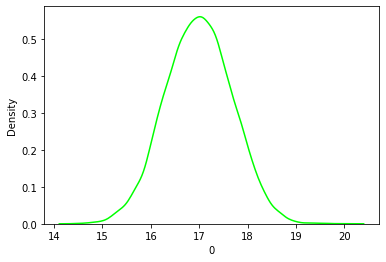

In [29]:
sns.distplot(data_sample_r[0] , color = 'lime' , hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


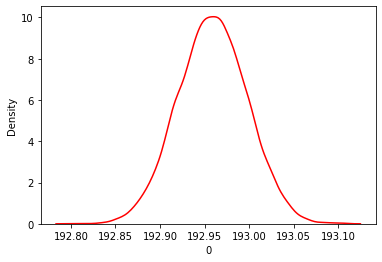

In [30]:
sns.distplot(data_sample_d[0] , color = 'red' , hist=False)